# Example notebook
## How to incorporate/use code from `common` module

### Import functions from common module to use where relevant

In [15]:
from common import load_image, show_image, load_data, split_data, validation_scores, merge_results

### Simple example usage of each function

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

# Load data
df = load_data()

# Split data
X_train, X_test, y_train, y_test = split_data(df)
# Preview shape of split data
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5335, 256) (5335,) (1334, 256) (1334,)


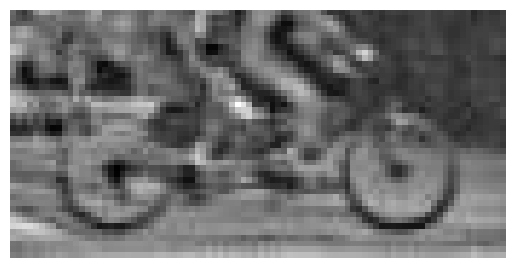

In [17]:
# Load an image by providing the image name and class (class name)
img = load_image(df.iloc[0]['image_name'], df.iloc[0]['class'])
# Show the image
show_image(img)

In [18]:
## Simple example of running an experiment
# Create a pipeline
pipe = make_pipeline(
    StandardScaler(),
    SVC(random_state=0, probability=True)
)
# Define parameters and options
param_grid = {
    'svc__C': [0.1, 1]
}
# Get results for grid search with each of the 3 required scoring metrics (detailed progress updates with verbose=3)
results = validation_scores(pipe, param_grid, X_train, y_train, verbose=3)

# Take a look at the validation results
print('\nValidation results:')
print(results)

Fitting 4 folds for each of 2 candidates, totalling 8 fits
Fitting 4 folds for each of 2 candidates, totalling 8 fits
Fitting 4 folds for each of 2 candidates, totalling 8 fits

Validation results:
{'accuracy':    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_svc__C  \
0       9.157719      0.311407         0.396440        0.042994          0.1   
1       7.642114      0.172613         0.419134        0.026541            1   

            params  split0_test_score  split1_test_score  split2_test_score  \
0  {'svc__C': 0.1}           0.901049           0.892804           0.905547   
1    {'svc__C': 1}           0.909295           0.893553           0.911544   

   split3_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.903226         0.900657        0.004805                2  
1           0.909227         0.905905        0.007192                1  , 'roc_auc':    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_svc__C  \

In [19]:
# Merge results into a unified dataframe (scorer will be new column)
mdf = merge_results(results)

# Save merged results to CSV file (all results -- all models * three scorers)
#mdf.to_csv('example_results.csv', index=False)

In [20]:
# Get top scoring for each scorer method
top_each = pd.concat([
    mdf[mdf['scorer']==scorer].sort_values(by='rank_test_score').head(3)
    for scorer in sorted(mdf['scorer'].unique())
], ignore_index=True)

# Save top 3 performing models for each scorers (9 total results, but likely fewer than 9 unique param options)
#top_each.to_csv('top_3_per_scorer.csv', index=False)

top_each

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,scorer
0,7.642114,0.172613,0.419134,0.026541,1,{'svc__C': 1},0.909295,0.893553,0.911544,0.909227,0.905905,0.007192,1,accuracy
1,9.157719,0.311407,0.396440,0.042994,0.1,{'svc__C': 0.1},0.901049,0.892804,0.905547,0.903226,0.900657,0.004805,2,accuracy
2,7.958136,0.224967,0.408382,0.028912,1,{'svc__C': 1},0.909538,0.894001,0.911823,0.909401,0.906191,0.007103,1,f1_score
3,9.399723,0.177236,0.428036,0.046479,0.1,{'svc__C': 0.1},0.901397,0.893280,0.905992,0.903481,0.901038,0.004765,2,f1_score
4,8.301846,0.073590,0.372635,0.016407,0.1,{'svc__C': 0.1},0.982798,0.978187,0.982303,0.982251,0.981385,0.001859,1,roc_auc
5,6.888871,0.151788,0.390781,0.038733,1,{'svc__C': 1},0.979637,0.974541,0.977593,0.978239,0.977503,0.001863,2,roc_auc


In [21]:
# Choose best model param options (assume after review that it matches first row)
best_params = top_each.iloc[0]['params']
best_params

{'svc__C': 1}

In [22]:
# Show all 3 scores for best model params
best_model_scores = mdf[mdf['params']==best_params]

# Save all 3 results for best model (3x different scorer methods)
#best_model_scores.to_csv('best_model_params_and_scores.csv')

best_model_scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,scorer
1,7.642114,0.172613,0.419134,0.026541,1,{'svc__C': 1},0.909295,0.893553,0.911544,0.909227,0.905905,0.007192,1,accuracy
3,6.888871,0.151788,0.390781,0.038733,1,{'svc__C': 1},0.979637,0.974541,0.977593,0.978239,0.977503,0.001863,2,roc_auc
5,7.958136,0.224967,0.408382,0.028912,1,{'svc__C': 1},0.909538,0.894001,0.911823,0.909401,0.906191,0.007103,1,f1_score
